In [1]:
import argparse
import sys
import os
import json
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
BASE_DIR = "/Users/katemarg/PycharmProjects/temporal_robustness_evaluation"
DATA_DIR = os.path.join(BASE_DIR, 'data')
CKPT_DIR = os.path.join(BASE_DIR, 'pretrained_models')
RES_DIR = os.path.join(BASE_DIR, 'results')
LOG_DIR = os.path.join(BASE_DIR, 'logs')
CACHE_DIR = os.path.join(BASE_DIR, 'cached')

TEMPLAMA_ORIG_DIR = os.path.join("data", "templama", "test.json")
TEMPLAMA_REPRODUCED_DIR = os.path.join("templama_docker", "reproduce1", "templama", "test.jsonl")
TEMPLAMA_NEW_DIR = os.path.join("templama_docker", "new_data1", "templama", "test.jsonl")

available_datasets = {
    "lama-conceptnet": {
        "data_dir" : os.path.join(DATA_DIR, "lama", "ConceptNet")
    },
    "lama-google-re": {
        "data_dir": os.path.join(DATA_DIR, "lama", "Google_RE")
    },
    "lama-squad": {
        "data_dir": os.path.join(DATA_DIR, "lama", "Squad")
    },
    "lama-trex": {
        "data_dir": os.path.join(DATA_DIR, "lama", "TREx")
    },
    "templama": {
        "data_dir": os.path.join(DATA_DIR, "templama")
    }
}

In [3]:
    def load_file(filename):
        """
        :param filename:
        :return:
        """
        data = []
        with open(filename, "r") as f:
            for line in f.readlines():
                data.append(json.loads(line))
        return data

### Original TempLAMA dataset (downloaded from Google Research github repo)
- 2010-2020
- 9 relations
- 1,000 subjects per relation

In [4]:
orig_templama = load_file(TEMPLAMA_ORIG_DIR)

In [5]:
len(orig_templama)

34963

In [6]:
len(set([x['query'] for x in orig_templama]))

4050

### Reproduced TempLAMA dataset (by running their code)

In [7]:
reproduced_templama = load_file(TEMPLAMA_REPRODUCED_DIR)

In [8]:
len(reproduced_templama)

58909

In [9]:
len(set([x['query'] for x in reproduced_templama]))

6906

In [10]:
reproduced_templama

[{'query': 'Alex Morgan plays for _X_.',
  'answer': {'wikidata_id': 'Q334526',
   'name': "United States women's national soccer team"},
  'date': '2010',
  'id': 'Q233510_P54_2010',
  'most_frequent_answer': {'wikidata_id': 'Q334526',
   'name': "United States women's national soccer team"},
  'most_recent_answer': {'wikidata_id': 'Q334526',
   'name': "United States women's national soccer team"},
  'relation': 'P54'},
 {'query': 'Alex Morgan plays for _X_.',
  'answer': {'wikidata_id': 'Q334526',
   'name': "United States women's national soccer team"},
  'date': '2011',
  'id': 'Q233510_P54_2011',
  'most_frequent_answer': {'wikidata_id': 'Q334526',
   'name': "United States women's national soccer team"},
  'most_recent_answer': {'wikidata_id': 'Q334526',
   'name': "United States women's national soccer team"},
  'relation': 'P54'},
 {'query': 'Alex Morgan plays for _X_.',
  'answer': {'wikidata_id': 'Q334526',
   'name': "United States women's national soccer team"},
  'date': 

### Updated TempLAMA dataset (by running their code)
- 2010-2022
- 9 relations
- 10,000 subjects per relation

In [42]:
new_templama = load_file(TEMPLAMA_NEW_DIR)

In [43]:
len(new_templama)

141133

In [44]:
len(set([x['query'] for x in new_templama]))

14246

### The task is Masked Language Modeling (MLM) / Fill-Mask and the evaluation metric is P@k.

In [5]:
# sns.set_theme(style="ticks")
def boxplot_vis(label):
    sns.barplot(x='year', y=label, data=results_df, hue='model', palette="rocket")
    sns.despine(offset=10, trim=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title("TempLAMA / single token / {}".format(label))
    plt.savefig('plots/{}_per_year.png'.format(label), bbox_inches = 'tight',edgecolor='white')

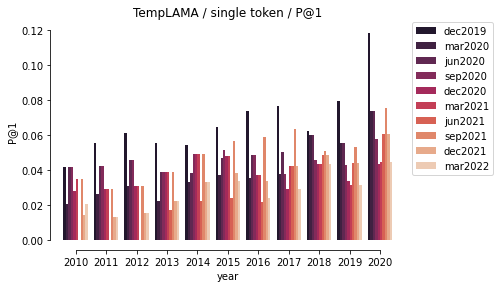

In [6]:
boxplot_vis("P@1")

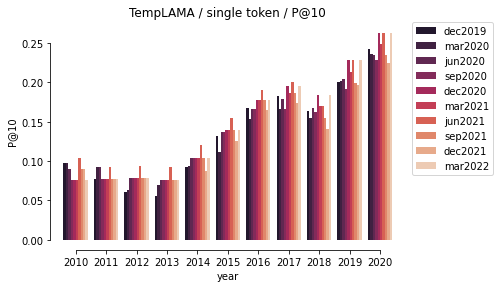

In [7]:
boxplot_vis("P@10")

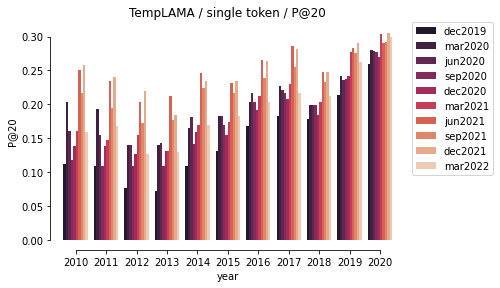

In [8]:
boxplot_vis("P@20")

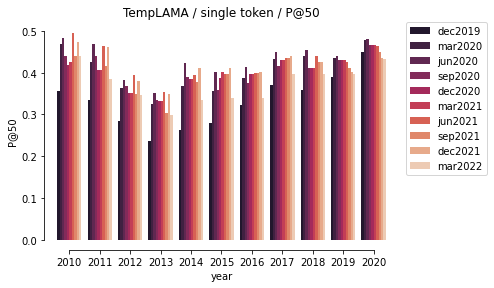

In [9]:
boxplot_vis("P@50")

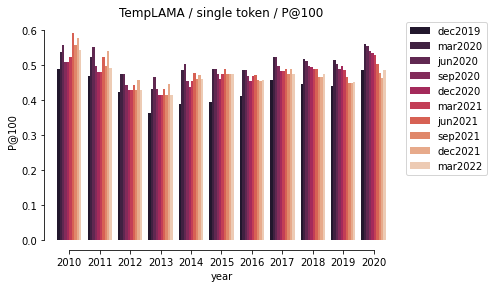

In [10]:
boxplot_vis("P@100")

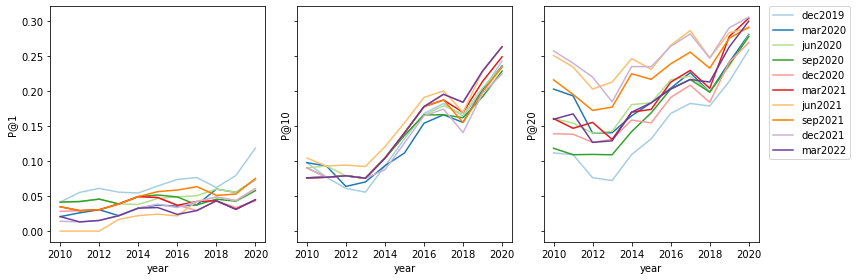

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4), sharey=True)
sns.lineplot(
    data=results_df,
    x="year", 
    y="P@1",
    hue="model", 
    palette="Paired",
    ax=ax1,
    legend=False
)
ax2.set_ylabel("P@10")
sns.lineplot(
    data=results_df,
    x="year", 
    y="P@10",
    hue="model", 
    palette="Paired",
    ax=ax2,
    legend=False
)
ax3.set_ylabel("P@20")
sns.lineplot(
    data=results_df,
    x="year", 
    y="P@20",
    hue="model", 
    palette="Paired",
    ax=ax3
)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
fig.tight_layout()
plt.savefig('plots/p_over_time_lineplot.png', bbox_inches = 'tight')

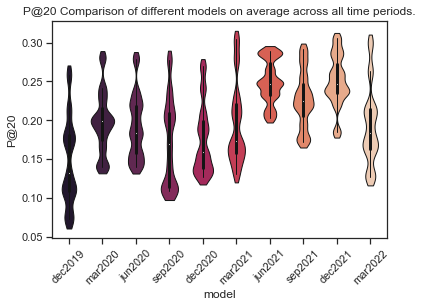

In [12]:
sns.set_theme(style="ticks")
sns.violinplot(data=results_df, y='P@20', x='model',palette="rocket", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('P@20 Comparison of different models on average across all time periods.')
plt.savefig('plots/P@20_avg_time.png', bbox_inches = 'tight')